In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## todo: Make notebook as close to solution as possible

## Problem 1 (5 Points)

Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### Problem 1a

Use the pandas library to load the `.csv` file as a data frame and display its contents.

See:

[`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[`pandas.DataFrame.head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [4]:
df = pd.read_csv('assignment_data.csv')
#print(df) # this prints the first and last few columns and rows
print(df.head()) 

   y          0          1          2          3          4          5   
0  0  22.979065  28.018860  28.018860  17.999268  -1.979919 -28.018860  \
1  0  -2.999878   1.019958   1.019958  -1.019958  -1.019958  -1.979919   
2  0  17.999268  25.978943  17.999268  22.019104  14.999390  34.978577   
3  0  44.998169  41.998291  32.998657  26.998901  22.979065  17.999268   
4  0  17.999268  25.018982  43.018250  55.977722  52.017883  50.997925   

           6          7          8  ...        168        169        170   
0 -44.998169 -58.977600 -52.977844  ... -29.998779 -37.018494 -38.998413  \
1  -8.999634 -10.019592 -19.979187  ...  40.978333  28.978821  19.979187   
2  64.017395  82.976624  88.016418  ...  25.978943  19.019226  14.999390   
3   7.019714  -1.019958  -7.979675  ... -49.977966 -55.017761 -59.997559   
4  43.978210  43.978210  34.978577  ...  40.978333  50.997925  61.017517   

         171        172        173        174        175        176        177  
0 -46.018127 -41.

### Problem 1b

Split the data frame into two frames: one for seizure-positive (y = 1) and one for negative (y = 0). Call the frame with the positives `X_pos` and call the frame with the negatives `X_neg`. Each row of the dataframe corresponds to a time series. Then print out the mean and standard deviation of the first time series of each dataframe. 

See:

[`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

[`pandas.DataFrame.query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)

[`pandas.DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

[`pandas.DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [5]:
X_pos = df.query('y == 1').reset_index(drop=True).iloc[:, 1:-1]
X_neg = df.query('y == 0').reset_index(drop=True).iloc[:, 1:-1]

# print(type(X_pos))
# print(type(X_neg))
# print(X_pos.loc[0])
# print(X_neg.loc[0])


pos_first = X_pos.loc[0]
neg_first = X_neg.loc[0]

#print(pos_first)

print(pos_first.mean())
print(pos_first.std())
print(neg_first.mean())
print(neg_first.std())

-62.78558073744262
198.93500284926913
-16.138326353945974
38.087650910830426


### Problem 1c

Plot the first three seizure-positive and seizure-negative times series in the positive and negative dataframes you made in part b (each row is a time series). In a 3x2 panel where the first column is seizure-negative, the second seizure-positive. We recommend a figure size of 14 x 12 (see the documentation of `plt.subplots` for more details on how to set the figure size)

See:

   [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

   [`matplotlib.axes.Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)

   [`matplotlib.axes.Axes.set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)


Comments:



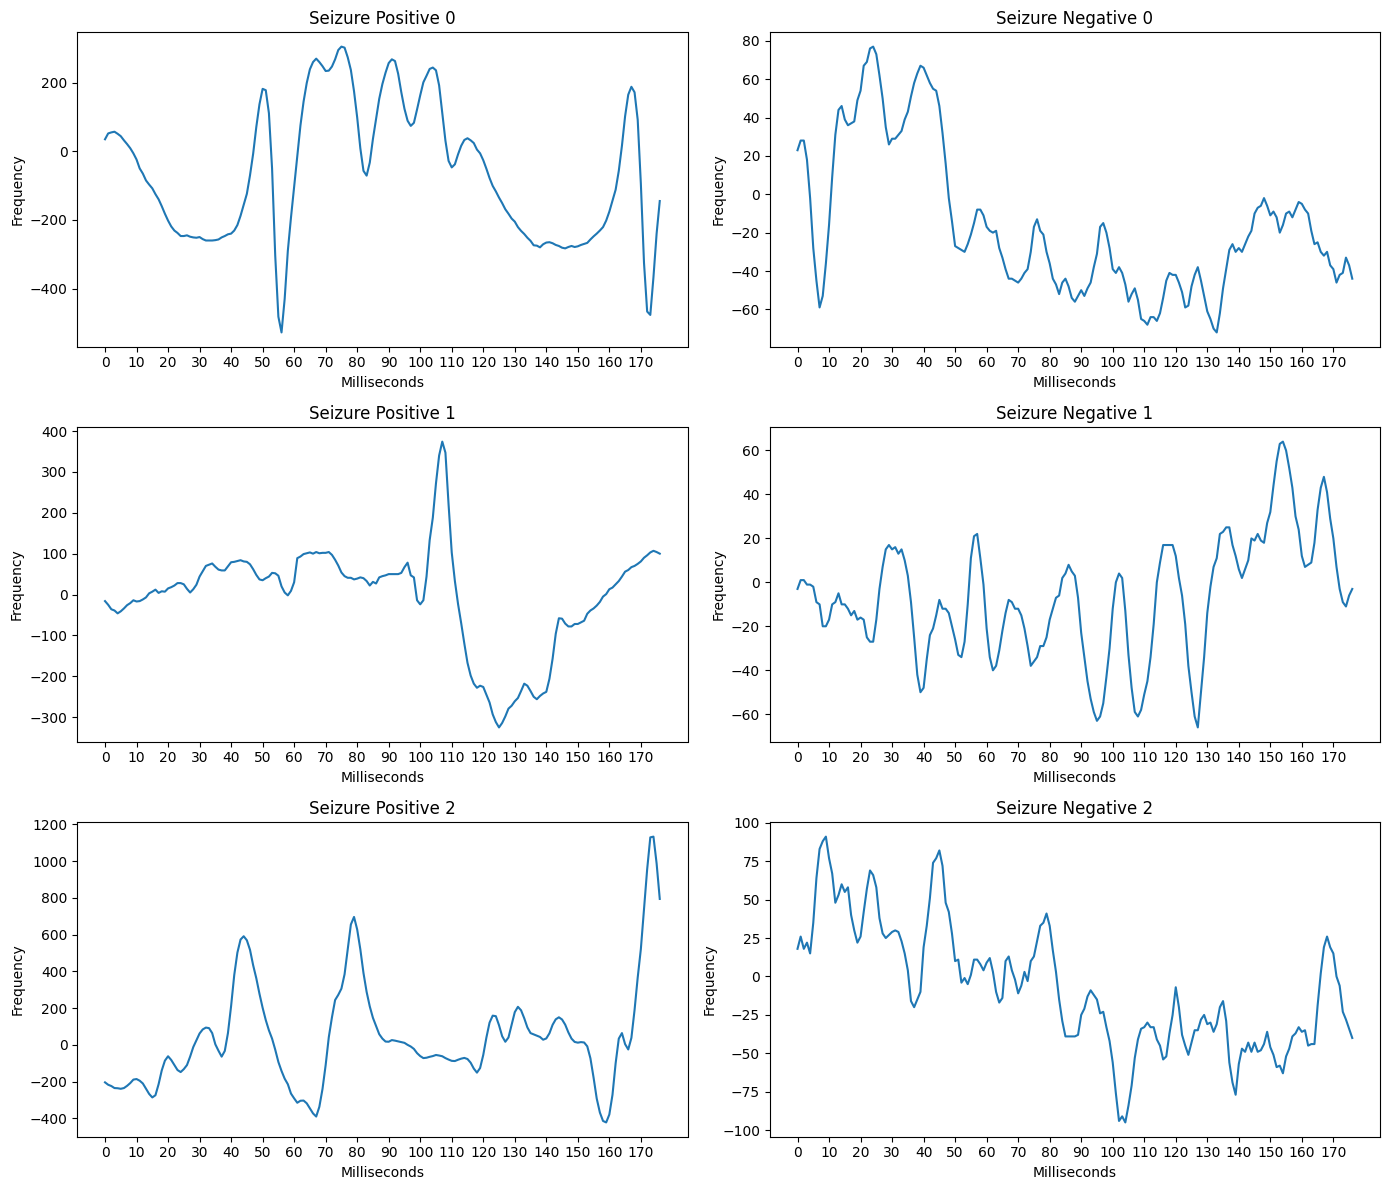

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
#fig, ax = plt.subplots()

#print(type(pos_plot))

#pos_plot.plot(ax=ax)
xticks = np.arange(0, 177, 10)

for i in range(3):
    axs[i, 0].plot(X_pos.loc[i])
    axs[i, 0].set_title('Seizure Positive ' + str(i))
    axs[i, 0].set_xticks(xticks)
    axs[i, 0].set_xlabel('Milliseconds')
    axs[i, 0].set_ylabel('Frequency')
    
for j in range(3):
    axs[j, 1].plot(X_neg.loc[j])
    axs[j, 1].set_title('Seizure Negative ' + str(j))
    axs[j, 1].set_xticks(xticks)
    axs[j, 1].set_xlabel('Milliseconds')
    axs[j, 1].set_ylabel('Frequency')

plt.tight_layout()


## Problem 2 (5 points)

### Problem 2a (0.5 Points)

In order to perform spectral analysis of the data, we will need to seperate out the the data from the dataframe into arrays. By convention, we name the labels `y` and the data `X`.

See:

[`pandas.DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

[`pandas.DataFrame.values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)

In [25]:
y = df.iloc[:, 0].to_numpy()
X = df.iloc[:, 1:-1].to_numpy()
X_pos_ary = X_pos.to_numpy()
X_neg_ary = X_neg.to_numpy()

### Problem 2b (2 Points)

Plot a spectrogram using a wavelet transform of two segment of the first time series in the `df_pos` and `df_neg` dataframes. Make sure to add a colorbar showing the amplitude, and to accurately label the frequency range on the y axis. 

See:

[`scipy.signal.cwt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html)


[`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

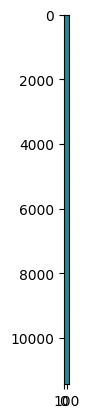

In [36]:
from scipy import signal
f, t, Zxx = signal.stft(np.flipud(X), nperseg=177)
#plt.pcolormesh(t, f, np.abs(Zxx), vmin=-1900, vmax=2050)
plt.imshow(np.flipud(X))

### Problem 2c (2 points)

Now we'll try a slightly different technique. Using a Short Time Fourier Transform (STFT), plot a spectogram the first time series in the `X_pos` and `X_neg` dataframes. Make sure to add a colorbar showing the amplitude, and to accurately label the frequency range on the y axis. 

The sampling frequency is `fs = 178`

See:

[`scipy.signal.stft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html)

[`matplotlib.pyplot.pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)

### Problem 2d (0.5 Points)

What do you notice (or not notice?) about the spectrogram during a seizure? What differences do you notice between the the wavelet transform and STFT? Why might that be the case knowing the differences between the two transforms?

Explaination here.

# Problem 3 (5 points)

### Problem 3a (1 point)

Normalize the EEG data so they have zero mean and unit variance. Call the normalized data `X_norm`.

See:

[`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html)

### Problem 3b (1 point)

Plot the distribution of labels in the dataset. Recall that `y = 1` represents seizure events and `y = 0` represents nominal activity. Plot the distribution of labels using a histogram. Notice that the distribution of labels isn't balanced. What kinds of problems might arise due to this?

See: 

[`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

[What is Imbalanced Classification?](https://machinelearningmastery.com/what-is-imbalanced-classification/)

Explanation here.

### Problem 3c (1 point)

Prune the dataset to balance the number of available labels so that they’re approximately equal in number, by discarding an appropriate number of randomly selected windows. Make sure to do the same for the data windows and the corresponding labels.

### Problem 3d (1 point)

Perform an FFT on each signal (i.e. for each row of the data array) to decompose it into the frequency bands commonly used in EEG (see lecture slides): delta (0.5 - 4 Hz), theta (4-8 Hz), alpha (8-14 Hz), beta (14-30 Hz) and gamma (>30 Hz). 

Take a snippet of the FFT signal for each frequency band. Recall from class that many ML algorithms expect a 1D vector for the inputs. This will be true for our case as well. To do this, concatenate (or flatten an array with the shape `num_bands` x `snippet_length`). The bands such that the new data length is (`number_bands` x `snippet_len`). Finally, we mke an array of these 1D vectors for each observation. The final output will be a 2D matrix with shape `num_observations` x (`num_bands` x `snippet_length`).

Recall from 2b that the sampling frequency is `fs = 178`

See:

[`scipy.fft.rfft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html)


[`scipy.fft.fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html)

[`numpy.ndarray.flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)

### Problem 3e (1 point)

Create two datasets: one with the normalized signal and one transformed with the FFT. Split both into identical training and test sets (i.e. the same samples for the time and frequency dataset make up the test set).

See:

[`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## Problem 4: Classification

### Problem 4a (1 point)

Write a function that calculates and prints the classification accuracy for a pair of (predicted, true) labels as a percentage.

See:

[`SVC.score`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

[`LinearDiscriminantAnalysis.score`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.score)

### Problem 4b (1 point)

Train an LDA and an SVM on your two training sets.

See:

[`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

### Problem 4c (1 point)

For each trained classifier, show the % accuracy on your test set, using the function you wrote. Does using the spectral analysis improve the accuracy? 

Plot or print a confusion matrix for each testing set (time series and frequency band). 

See: 

[`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[What is a confusion matrix](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)

### Problem 4d (1 point)

Now, train classifiers using different ratios of training/testing set size. For example, starting with 90%/10% training/testing split, and iterating down to say 10% training data, 90% test data. What do you observe? Plot the test set accuracy for each of the two classifier types as a function of the train/test ratio.

See the methods of:

[`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[`sklearn.lda.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)


### Problem 4e (1 point)

Re-train the classifiers (using either the signal or its spectral components) without balancing the number of labels (i.e. the way the data originally appeared). Is there a difference in performance on the test set? Explain why.

### Problem 5a (2.5 points)

In a couple of paragraphs, discuss the two points:

What are the assumptions used by the two classifiers? How do you think they affect their relative performance on this dataset?

Why would we want to scale data to have zero mean in machine learning tasks?

See: 

[`SVM Tutorial`](https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)

[`LDA Tutorial`](http://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_LDA09.pdf)


Your answer here.

### Problem 5b (2.5 points)

Computational time is a major consideration for real-time applications of machine learning. Use python’s `timeit.timeit` function to measure how long each classifier takes to converge for multiple iterations (this influences resources that need to be dedicated to training the model), and how long it takes to classify the test data (which affects loop performance). 

Fix your `test_size` to be 0.2. Get the average time for fitting over 100 runs (go make a hot pocket or something in the meantime since it'll take 1-2 mins). Also get the average time for running prediction over 300 runs (this will also take some time).

There is no need to redo a train-test split for every predict run. Fitting it over the same training set is fine.

In some scenarios, you might need to run more data-hungry and computationally expensive models. Discuss the trade-off between computational time and accuracy in real-time applications, such as applying electrical stimulation in response to seizure onsets.

See:

[`timeit.timeit`](https://docs.python.org/3.8/library/timeit.html)

[Magic Timeit](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)